# Bengaluru_house_prices_prediction


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

## Read csv file

In [92]:
df1 = pd.read_csv("bengaluru_house_prices.csv")

In [93]:
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [94]:
df1.shape

(13320, 9)

We have "13320" Rows and "9" Columns in our dataset

In [95]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [96]:
#droping the columns that are not needed
df2 = df1.drop(["area_type","availability","society","balcony"],axis =1)
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

# Data Cleaning

In [97]:
## checking null values in our dataset
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [98]:
#droping the null values
df3 = df2.dropna()

In [99]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Now we have successfully remove the null values.

In [100]:
#check values of size column
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

from the above we can see that the "size" column has differnt values so we create a new column to store a similar values that we can use further.

In [101]:
#creating a new column "bhk"
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

C:\Users\arora\AppData\Local\Temp\ipykernel_21976\1840170324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))


location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [102]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [103]:
#check "total_sqft" column
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

from above we can see that some of the values are in range (eg='1133 - 1384')

In [104]:
#function to check float value 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [105]:
df3[~df3["total_sqft"].apply(is_float)].head()

location   size   total_sqft  bath    price  bhk
30            Yelahanka  4 BHK  2100 - 2850   4.0  186.000    4
122              Hebbal  4 BHK  3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar  2 BHK  1042 - 1105   2.0   54.005    2
165            Sarjapur  2 BHK  1145 - 1340   2.0   43.490    2
188            KR Puram  2 BHK  1015 - 1540   2.0   56.800    2

now, we are going to conert the above range or float numbers into an integer number by converting them into their average

in the above code "~" this expression negative the result which means convert the bollean true into false and false into true

In [106]:
#coverting range into average
def covert_total_sqft_to_avg(x):
    token = x.split("-")
    if len(token) == 2:
        return (float(token[0])+float(token[1])/2) #it will do avg
    try:
        return float(x)
    except:
        return None
        

In [107]:
#converting values
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(covert_total_sqft_to_avg)
print(df4.head())

                   location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2


In [108]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


# Feature Engineering

In [109]:
# price per sqft (new column)
df5 =df4.copy()
df5["price_per_sqft"]  = df5["price"] * 100000 / df5["total_sqft"]
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [110]:
#check unique values in location
df5["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [111]:
#let see how many locations we have
len(df5.location.unique())

1304

we have total 1304 locations in our data

### there will be many locations that has only 1 or 2 data points so we are going to remove those from our data.

In [112]:
#now we remove extra spaces from location 
df5.location = df5.location.apply(lambda x: x.strip())
# it will give statistics for location
location_stats = df5.groupby("location")["location"].agg('count').sort_values(ascending =False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

from the above we can see that, there are 535,392 and mora data point that are taking spaces and are useless

In [113]:
#now we find how many locations have data point less than or equal to 10
len(location_stats[location_stats <=10])

1052

There are "1052" locations out of "1293" which has data points less than  or equal to 10

In [114]:
#now see the locations with data points less than or equal 10
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [115]:
len(df5.location.unique())

1293

In [116]:
# Replace locations with 10 or fewer data points with "other"
df5.location = df5.location.apply(lambda x : "other" if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

now we have 242 locations.

In [117]:
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

# Outliers detection and removal

note-> Assume 1bhk required 300sqft(approx)

In [118]:
# find values that are less than 300 sqft
df5[df5.total_sqft/df5.bhk<300].head()


location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [119]:
df5.shape

(13246, 7)

In [120]:
#we remove the above outliers
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [121]:
df6.shape

(12502, 7)

In [122]:
#checking minimum and maximum price per sqft
df6.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

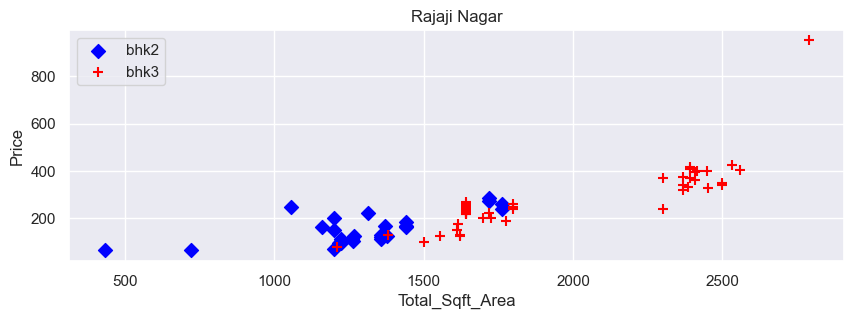

In [123]:
#visualiszing outliers using scatter plot
#property price for 2 and 3 bhk

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    sns.set(rc={"figure.figsize": (10, 3)})
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label = "bhk2", marker = "D", s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, color ="red", label ="bhk3", marker = "+",s=50)
    plt.xlabel("Total_Sqft_Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df4,"Rajaji Nagar")


In [124]:
#remove outliers from price per sqft
def remove_pps_outlier(df):
    # Create an empty DataFrame to store the filtered results
    df_out = pd.DataFrame()
    
    # Group the DataFrame by 'location'
    for key, subdf in df.groupby("location"):
        # Calculate mean and standard deviation of 'price_per_sqft' for each location
        m = np.mean(subdf.price_per_sqft)  # Mean price per square foot
        sd = np.std(subdf.price_per_sqft)   # Standard deviation of price per square foot
        
        # Define the range for filtering outliers
        lower_bound = m - sd  # Lower bound
        upper_bound = m + sd  # Upper bound
        
        # Filter out properties with 'price_per_sqft' within the defined range
        reduce_df = subdf[(subdf.price_per_sqft > lower_bound) & (subdf.price_per_sqft < upper_bound)]
        
        # Concatenate the filtered DataFrame with the output DataFrame
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    
    return df_out

    
df7 = remove_pps_outlier(df6)
df7.shape

(10231, 7)

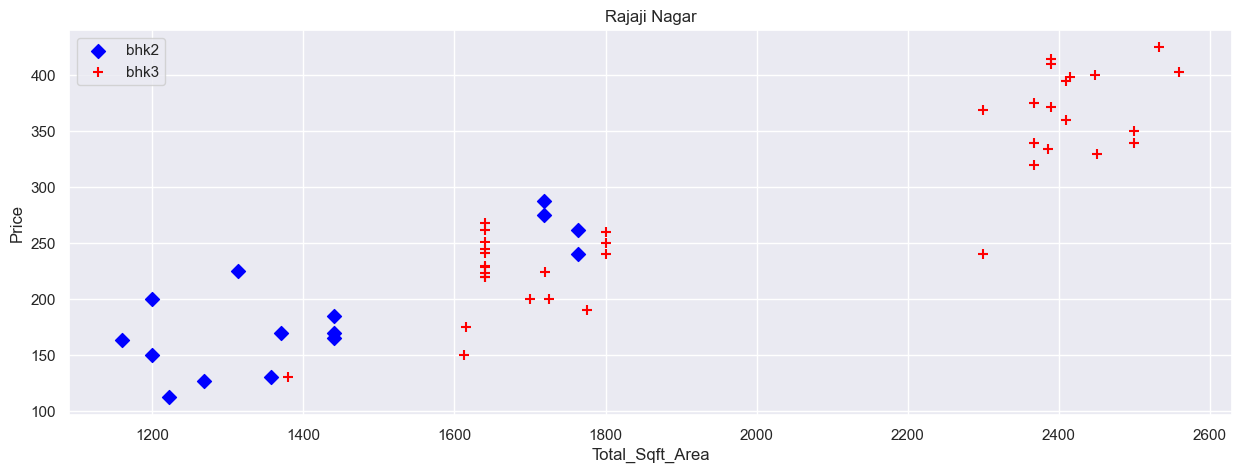

In [125]:
#property price for 2 and 3 bhk

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    sns.set(rc={"figure.figsize": (15, 5)})
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label = "bhk2", marker = "D", s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, color ="red", label ="bhk3", marker = "+",s=50)
    plt.xlabel("Total_Sqft_Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")


In [126]:
#removing outliers from property price
def remove_bhk_outliers(df):
    # Create an empty array to store indices of outliers to exclude
    exclude_indices = np.array([])
    
    # Group the DataFrame by 'location'
    for location, location_df in df.groupby("location"):
        # Dictionary to store statistics for each BHK type in this location
        bhk_stats = {}
        
        # Loop through each BHK type in this location
        for bhk, bhk_df in df.groupby("bhk"):
            # Calculate mean, standard deviation, and count for price_per_sqft of this BHK type
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "sd": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        
        # Loop through each BHK type in this location again
        for bhk, bhk_df in location_df.groupby("bhk"):
            # Get stats of the previous BHK type if exists and has enough data points (count > 5)
            stats = bhk_stats.get(bhk - 1)
            
            # If previous BHK type stats exist and has enough data points, remove outliers
            if stats and stats["count"] > 5:
                # Find indices of properties with price_per_sqft less than mean of previous BHK type
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats["mean"])].index.values)
    
    # Drop rows with indices of outliers from the DataFrame
    return df.drop(exclude_indices, axis="index")

# Apply the function to remove outliers from df7 DataFrame and get df8
df8 = remove_bhk_outliers(df7)

# Print the shape of the resulting DataFrame after removing outliers
print(df8.shape)


(5326, 7)


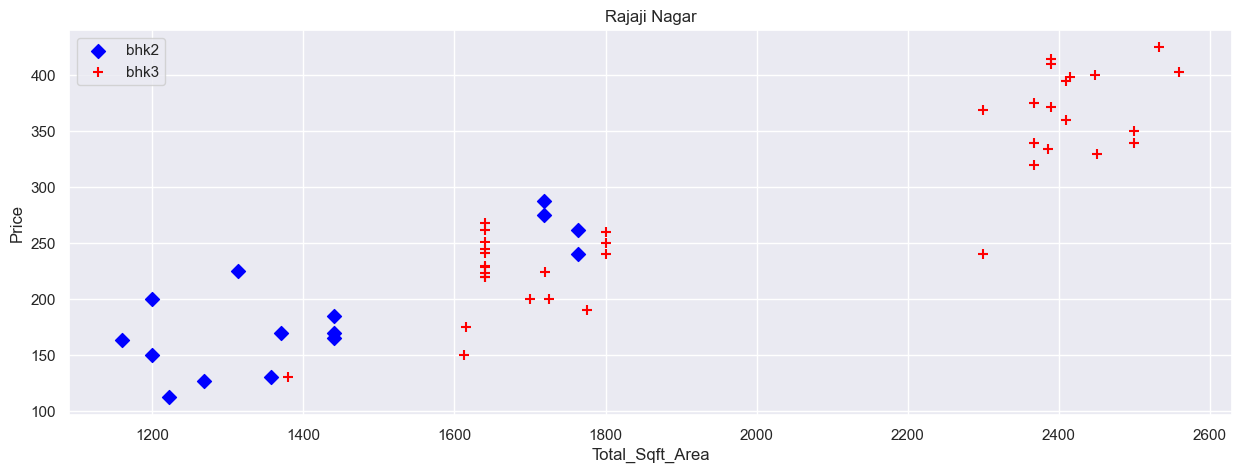

In [127]:
#after removing the outliers the scatter plot look like
#property price for 2 and 3 bhk

def plot_scatter_chart(df,location):
    bhk2 = df[(df8.location == location) & (df8.bhk == 2)]
    bhk3 = df[(df8.location == location) & (df8.bhk == 3)]
    sns.set(rc={"figure.figsize": (15, 5)})
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label = "bhk2", marker = "D", s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, color ="red", label ="bhk3", marker = "+",s=50)
    plt.xlabel("Total_Sqft_Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df8,"Rajaji Nagar")


Removing Outliers:

for bhk, bhk_df in location_df.groupby("bhk")::
Groups the subset location_df by BHK type again.
Checks if there are previous BHK type statistics (stats) and if there are enough data points (count > 5).
If conditions are met, finds indices of properties with price_per_sqft less than the mean of the previous BHK type.
Appends these indices to the exclude_indices array.

In [128]:
# checking how many unique values in bath(bathrooms) column
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 16., 12., 13.])

In [129]:
#check outlier in bath
df8[df8.bath>10]

location    size  total_sqft  bath  price  bhk  price_per_sqft
8565    other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9298    other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9629    other  13 BHK      5425.0  13.0  275.0   13     5069.124424

In [130]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
5234   Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6705  Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8401        other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [131]:
#removing outliers
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(5260, 7)

# EDA(Exploratory Data Analysis)

df9.head()

In [132]:
df9.shape


(5260, 7)

In [133]:
# checking missing value in our data
missing = df9.isnull().sum()
missing 

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

we dont have any missing value in our data

C:\Users\arora\AppData\Local\Temp\ipykernel_21976\2933820560.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df9["price_per_sqft"],kde = True, bins=20)


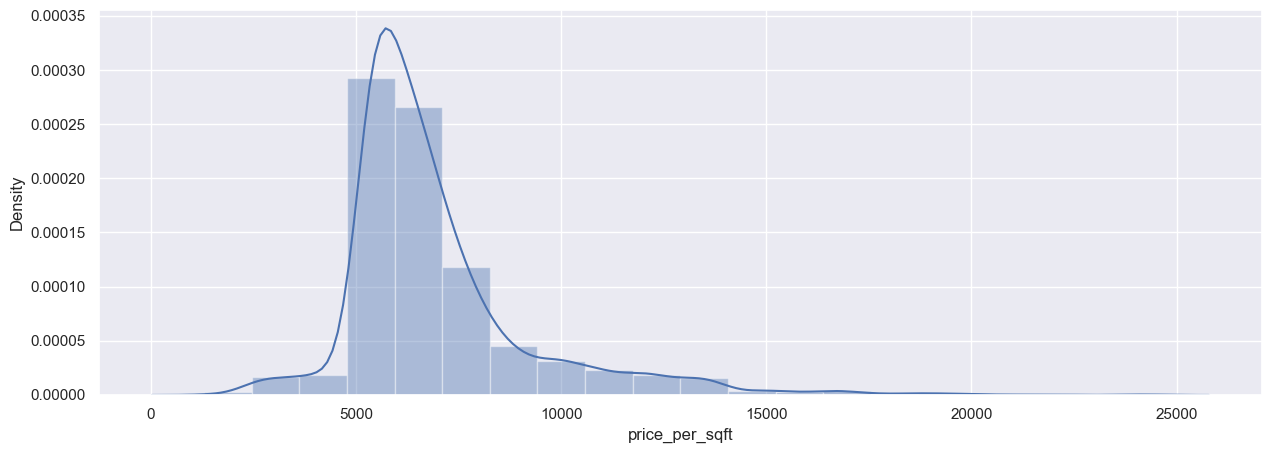

In [134]:
# visualizing price_per_sqft using histogram
sns.distplot(df9["price_per_sqft"],kde = True, bins=20)
sns.set(rc={"figure.figsize":(5,5)})

The above graph is righ skewd which shows that the their are very less properties with the sqft in the range of 15000-20000

## correlation

In [135]:
numerical_features = df9.select_dtypes(include = [np.number])
numerical_features.columns

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [136]:
categorical_features = df9.select_dtypes(include = [object])
categorical_features.columns

Index(['location', 'size'], dtype='object')

In [137]:
correlation = numerical_features.corr()
print(correlation["price"].sort_values(ascending = False), '/n')

price             1.000000
total_sqft        0.848975
price_per_sqft    0.690035
bath              0.603459
bhk               0.578677
Name: price, dtype: float64 /n


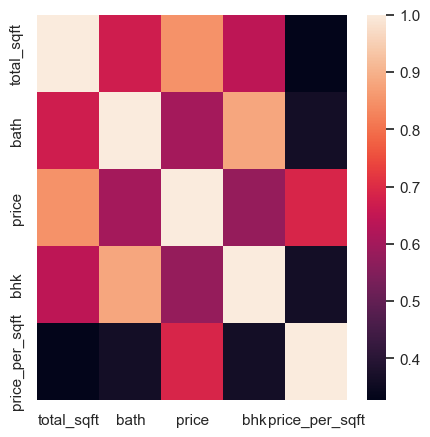

In [138]:
#using heatmap to visualize
sns.heatmap(correlation)
sns.set(rc={"figure.figsize":(15,5)})

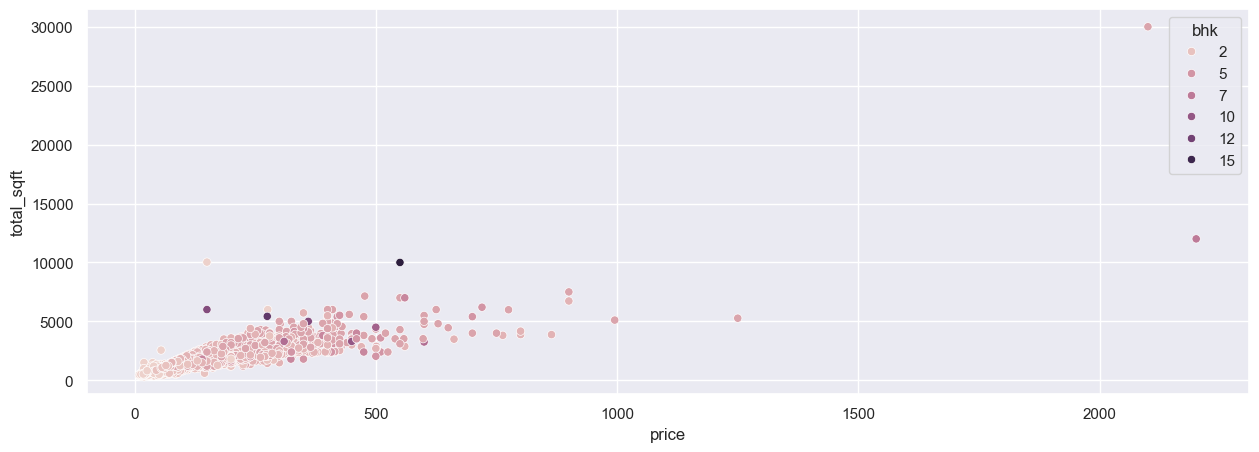

In [139]:
#visualizing total_sqft and price using scatter plot

sns.scatterplot(y="total_sqft", x="price",data=df9,hue = "bhk")
sns.set(rc={"figure.figsize":(10,6)})

from above we can see that there are very less number of appartments which are 12 and 15 bhk

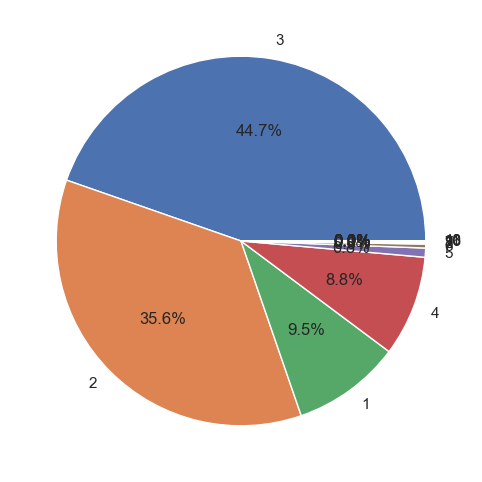

<Figure size 800x600 with 0 Axes>

In [140]:
# pie chart for representing bhk
data = df9["bhk"].value_counts()
plt.pie(data,labels=data.index,autopct = "%1.1f%%")
plt.figure(figsize=(8, 6))
plt.show()

from above pie chart we can see that in our data set there are 2 and 3 bhk appartments are in large number.

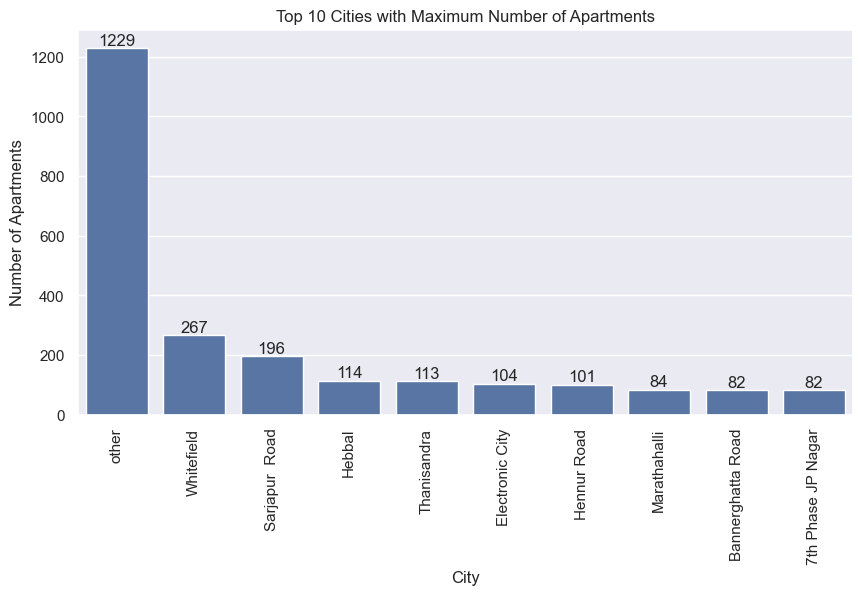

In [141]:
#top 10 cities with maximum number of appartments
top_10 = df9.groupby(["location"], as_index=False)["bhk"].count().sort_values(by="bhk", ascending=False).head(10)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="location", y="bhk", data=top_10)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Number of Apartments")
plt.title("Top 10 Cities with Maximum Number of Apartments")
plt.show()


above graph shows which city has how many number of appartments

<Axes: xlabel='bhk', ylabel='price'>

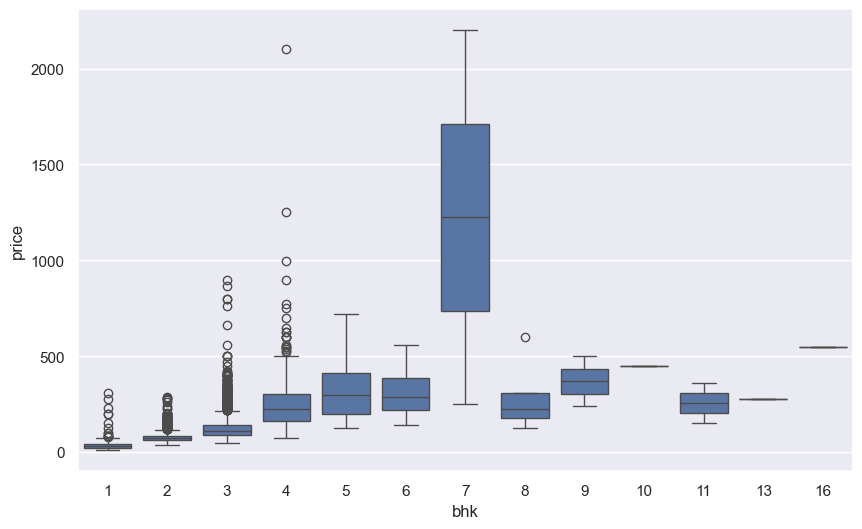

In [142]:
#box plot to see outliers
sns.boxplot(x="bhk",y="price",data=df9)

The graph shows that only in 7bhk and 9 bhk we have zero outliers

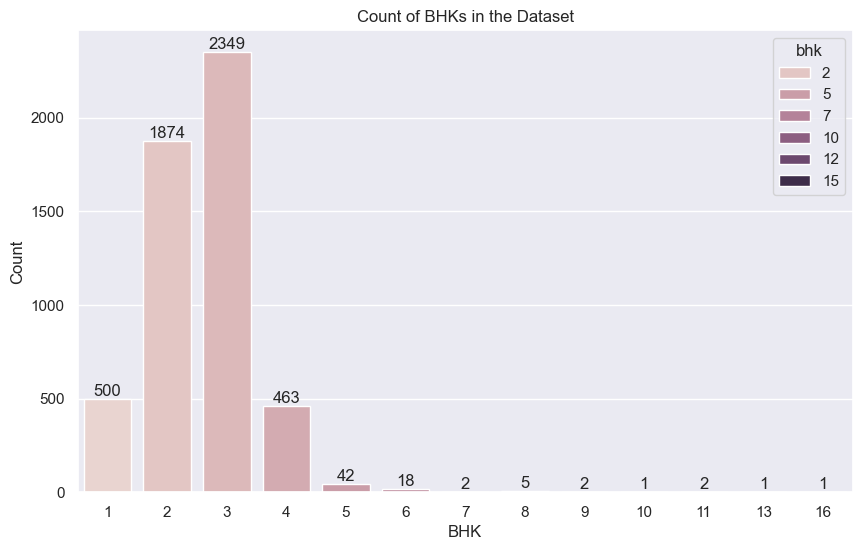

In [143]:
#count plot to visualize the number of occurrences of each "bhk" value in your dataset
ax = sns.countplot(x="bhk",data=df9,hue = "bhk")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("BHK")
plt.ylabel("Count")
plt.title("Count of BHKs in the Dataset")
sns.set(rc={"figure.figsize":(10,3)})

we have "2349" appartments of 3 bhk

# ML for prediction

lets remove the columns that are not needed for ml.


In [144]:
df9.head()

location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668

In [145]:
# droping sixe, per_sqft
df10 = df9.drop(["size","price_per_sqft"],axis =1)
df10.head()

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

In [146]:
#convert the "location" categorical to numerical
dumies = pd.get_dummies(df10.location)
dumies.head(3)



1st Block Jayanagar  1st Phase JP Nagar  2nd Stage Nagarbhavi  \
0                 True               False                 False   
1                 True               False                 False   
2                 True               False                 False   

   5th Block Hbr Layout  5th Phase JP Nagar  6th Phase JP Nagar  \
0                 False               False               False   
1                 False               False               False   
2                 False               False               False   

   7th Phase JP Nagar  8th Phase JP Nagar  9th Phase JP Nagar  AECS Layout  \
0               False               False               False        False   
1               False               False               False        False   
2               False               False               False        False   

   ...  Vidyaranyapura  Vijayanagar  Vishveshwarya Layout  Vittasandra  \
0  ...           False        False                 False        False   
1  ...           False        False                 False        False   
2  ...           False        False                 False        False   

   Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  Yeshwanthpur  \
0       False           False      False               False         False   
1       False           False      False               False         False   
2       False           False      False               False         False   

   other  
0  False  
1  False  
2  False  

[3 rows x 219 columns]

In [147]:
#concat the df10 and dumies
df11 = pd.concat([df10,dumies.drop("other",axis ="columns")],axis ="columns")
df11.shape
df11.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                 True   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                 True   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                 True   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                 True   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                 True   

   1st Phase JP Nagar  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0               False                 False                 False   
1               False                 False                 False   
2               False                 False                 False   
3               False                 False                 False   
4               False                 False                 False   

   5th Phase JP Nagar  ...  Varthur  Vidyaranyapura  Vijayanagar  \
0               False  ...    False           False        False   
1               False  ...    False           False        False   
2               False  ...    False           False        False   
3               False  ...    False           False        False   
4               False  ...    False           False        False   

   Vishveshwarya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                 False        False       False           False      False   
1                 False        False       False           False      False   
2                 False        False       False           False      False   
3                 False        False       False           False      False   
4                 False        False       False           False      False   

   Yelahanka New Town  Yeshwanthpur  
0               False         False  
1               False         False  
2               False         False  
3               False         False  
4               False         False  

[5 rows x 223 columns]

In [148]:
df12 = df11.drop("location",axis = 1)
df12.head()

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                 True               False   
1      1630.0   3.0  194.0    3                 True               False   
2      1875.0   2.0  235.0    3                 True               False   
3      1200.0   2.0  130.0    3                 True               False   
4      1235.0   2.0  148.0    2                 True               False   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                 False                 False               False   
1                 False                 False               False   
2                 False                 False               False   
3                 False                 False               False   
4                 False                 False               False   

   6th Phase JP Nagar  ...  Varthur  Vidyaranyapura  Vijayanagar  \
0               False  ...    False           False        False   
1               False  ...    False           False        False   
2               False  ...    False           False        False   
3               False  ...    False           False        False   
4               False  ...    False           False        False   

   Vishveshwarya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                 False        False       False           False      False   
1                 False        False       False           False      False   
2                 False        False       False           False      False   
3                 False        False       False           False      False   
4                 False        False       False           False      False   

   Yelahanka New Town  Yeshwanthpur  
0               False         False  
1               False         False  
2               False         False  
3               False         False  
4               False         False  

[5 rows x 222 columns]

In [149]:
# independent variables
x = df12.drop("price",axis ="columns")
x.head()

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                 True               False   
1      1630.0   3.0    3                 True               False   
2      1875.0   2.0    3                 True               False   
3      1200.0   2.0    3                 True               False   
4      1235.0   2.0    2                 True               False   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                 False                 False               False   
1                 False                 False               False   
2                 False                 False               False   
3                 False                 False               False   
4                 False                 False               False   

   6th Phase JP Nagar  7th Phase JP Nagar  ...  Varthur  Vidyaranyapura  \
0               False               False  ...    False           False   
1               False               False  ...    False           False   
2               False               False  ...    False           False   
3               False               False  ...    False           False   
4               False               False  ...    False           False   

   Vijayanagar  Vishveshwarya Layout  Vittasandra  Whitefield  Yelachenahalli  \
0        False                 False        False       False           False   
1        False                 False        False       False           False   
2        False                 False        False       False           False   
3        False                 False        False       False           False   
4        False                 False        False       False           False   

   Yelahanka  Yelahanka New Town  Yeshwanthpur  
0      False               False         False  
1      False               False         False  
2      False               False         False  
3      False               False         False  
4      False               False         False  

[5 rows x 221 columns]

In [150]:
#dependent variables
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=50)

# 1. Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)
linear_reg_score = linear_reg_model.score(x_test, y_test)

# 2. Lasso Regression
lasso_params = {'alpha': [0.1, 1, 10]}  # Hyperparameters for Lasso Regression
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(x_train, y_train)
lasso_score = lasso_grid.score(x_test, y_test)

# 3. GridSearchCV (e.g., DecisionTreeRegressor)
grid_params = {'max_depth': [3, 5, 7]}  # Hyperparameters for DecisionTreeRegressor
grid_model = GridSearchCV(DecisionTreeRegressor(), grid_params, cv=5)
grid_model.fit(x_train, y_train)
grid_score = grid_model.score(x_test, y_test)

# Print the R^2 scores for each model
print("R^2 Score for Linear Regression:", linear_reg_score)
print("R^2 Score for Lasso Regression:", lasso_score)
print("R^2 Score for GridSearchCV (Decision Tree):", grid_score)


R^2 Score for Linear Regression: 0.8064780404664946
R^2 Score for Lasso Regression: 0.7873836069459655
R^2 Score for GridSearchCV (Decision Tree): 0.7105548903514478


C:\Users\arora\AppData\Local\Temp\ipykernel_21976\1612151521.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=models, y=scores, palette=['b',"r","g"], hue=None,)


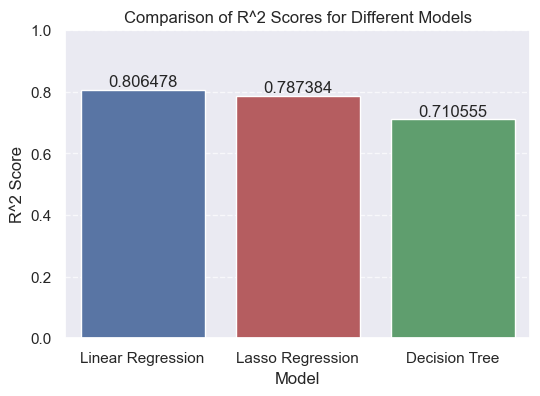

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# R^2 scores for each model
models = ['Linear Regression', 'Lasso Regression', 'Decision Tree']
scores = [linear_reg_score, lasso_score, grid_score]

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 4))
ax=sns.barplot(x=models, y=scores, palette=['b',"r","g"], hue=None,)

# Adding labels on top of each bar
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores for Different Models')
plt.ylim(0, 1)  # Set y-axis limit for better visualization of scores
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [154]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming x and y are your features and target variable
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=50)

# Initialize and train the model
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)

# Predict using the testing data
y_pred = lr_clf.predict(x_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


R^2 score: 0.8064780404664946
Mean Absolute Error (MAE): 21.22409652995334
Mean Squared Error (MSE): 1976.4920965560973
Root Mean Squared Error (RMSE): 44.457756314912
Mean Absolute Percentage Error (MAPE): 19.32215415161468


In [ ]:

# finding best model for more accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Train-test splits
# 1) Train 20%, Test 80%
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=50)

# 2) Train 30%, Test 70%
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=50)

# 3) Train 40%, Test 60%
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.4, random_state=50)

# Initialize models
lr_clf1 = LinearRegression()
lr_clf2 = LinearRegression()
lr_clf3 = LinearRegression()

# Fit models
lr_clf1.fit(x_train1, y_train1)
lr_clf2.fit(x_train2, y_train2)
lr_clf3.fit(x_train3, y_train3)

# Evaluate models
score1 = lr_clf1.score(x_test1, y_test1)
score2 = lr_clf2.score(x_test2, y_test2)
score3 = lr_clf3.score(x_test3, y_test3)

# Print scores
print("Score for Train 80%, Test 20%:", score1)
print("Score for Train 70%, Test 30%:", score2)
print("Score for Train 60%, Test 40%:", score3)


the model with the 60% training and 40% testing split appears to be more accurate based on the provided scores


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Scores for each train-test split
scores = [0.7898758745138401, 0.7966989481030222, 0.8064780404664946]

# Labels for the plots
labels = ["Train 80%, Test 20%", "Train 70%, Test 30%", "Train 60%, Test 40%"]

# Create a distribution plot
ax = sns.barplot(x=labels, y=scores)
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={"figure.figsize":(5,3)})
plt.xlabel('Train-Test Split')
plt.ylabel('Model Score')
plt.title('Comparison of Model Scores for Different Train-Test Splits')
plt.ylim(0, 1)  # Set y-axis limit for better visualization of scores
plt.show()


In [ ]:
#now we will use 40% testing and 60% training
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test =train_test_split(x,y,test_size = 0.4, random_state = 50)

In [ ]:
# Reshape y_pred to match the shape of y_true
y_pred = y_pred[:y_true.shape[0]]


In [ ]:
print("Shape of y_true after adjustment:", y_true.shape)
print("Shape of y_pred after adjustment:", y_pred.shape)


In [ ]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
y_pred = lr_clf.predict(x_test)
score = lr_clf.score(x_test, y_test)

print("R2 score:", score)


The R² score indicates how well the model fits the testing data, with higher values closer to 1 indicating a better fit.

In [ ]:
# Calculate and print the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
y_pred = lr_clf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

In [ ]:
# Adjust y_pred to match the shape of y_true
y_pred_adjusted = y_pred[:y_true.shape[0]]


In [ ]:
# Assuming lr_clf is your trained regression model
# Generate predictions for all samples in the test data
y_pred = lr_clf.predict(x_test)

# Calculate MAPE using the adjusted y_pred
mapr = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mapr)


The MSE represents the average squared difference between the predicted and actual target values, with lower values indicating better performance of the model.

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv =  ShuffleSplit(n_splits =5,test_size=0.40,random_state=0)



This code creates a cross-validation strategy called ShuffleSplit with 5 splits, where each split consists of 40% of the data for testing and 60% for training. It shuffles the data before splitting to help ensure randomness in the splits.

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(LinearRegression(),x,y,cv=cv)
score

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_true is the true prices and y_pred is the predicted prices
y_true = np.array([100000, 150000, 200000, 250000, 300000])
y_pred = np.array([98000, 155000, 190000, 260000, 310000])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r_squared = r2_score(y_true, y_pred)
print("R-squared:", r_squared)


## Continue model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(x, y, cv):
    # Dictionary of algorithms and their respective parameters for GridSearchCV
    algos = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'Lasso Regression': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

# Assuming x and y are your features and target variable
# Assuming cv is your ShuffleSplit
find_best_model_using_gridsearchcv(x, y, cv)




This code defines a function find_best_model_using_gridsearchcv which takes features x, target y, and a cross-validation strategy cv as inputs. It then searches for the best hyperparameters for three different models (Linear Regression, Lasso Regression, and Decision Tree) using GridSearchCV with the specified parameter grids for each model. The function returns a DataFrame containing the best score and best parameters for each model.

In [ ]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]

    x_vals = np.zeros(len(x.columns))
    x_vals[0] = sqft
    x_vals[1] = bath
    x_vals[2] = bhk
    if loc_index >= 0:
        x_vals[loc_index] = 1

    return lr_clf.predict([x_vals])[0]



The predict_price function predicts the price of a house using a trained linear regression model (lr_clf) and input parameters like location, square footage (sqft), number of bathrooms (bath), and bedrooms (bhk). It sets the location value to 1 in the input array (x) based on the location index and returns the predicted price.

In [ ]:

# Calculate residuals (differences between actual and predicted values)
residuals = y_train - lr_clf.predict(x_train)

# Plot residuals against predicted values
sns.set(rc={"figure.figsize":(7,4)})
plt.scatter(lr_clf.predict(x_train), residuals, marker = "+",color="b")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


This code calculates the residuals (difference between actual and predicted prices) for the training data and plots them against the predicted prices. The plot shows the residuals on the y-axis and predicted prices on the x-axis. The red dashed line at y=0 represents zero residuals, aiming for a random scatter of points around this line to indicate a good model fit.

In [ ]:
predicted_price = predict_price("1st Phase JP Nagar", 1000, 2, 2)
predicted_price


In [ ]:
predicted_price = predict_price("1st Phase JP Nagar", 1000, 2, 3)
predicted_price


In [ ]:
predicted_price = predict_price("2nd Stage Nagarbhavi", 1000, 2, 2)
predicted_price


## exporting files 

In [ ]:
import pickle
with open("Bangluru_house_prices_model.pickle","wb") as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns={ "data_columns" : [col.lower() for col in x.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))